In [53]:
!pip install vk

In [3]:
import vk

In [4]:
token = ""
session = vk.Session(access_token=token)  
vk_api = vk.API(session)

In [5]:
personal_token = ""  
vk_personal_api = vk.API(session)

In [6]:
import time
def get_members(groupid, fields=('sex', 'bdate', 'city', 'country', 'domain')):
    first = vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92)
    data = first["items"]  
    count = first["count"] // 1000 
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
        time.sleep(3)
    return data

In [7]:
members = get_members("bolbfest")

In [90]:
len(members)

33567

In [147]:
def save_members_to_file(filename, members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"]
            first_name = member["first_name"]
            last_name = member["last_name"]
            
            sex = member["sex"]
            if int(sex) == 1: 
                sex = "F"  
            elif int(sex) == 2: 
                sex = "M"
            else:  # 
                sex = "-" 
                
            bdate = member.get('bdate', "-")  
            if len(bdate.split(".")) == 3: 
                bdate = bdate.split(".")[-1] 
            else:  # 
                bdate = "-" 
                
            city = member.get('city', {}).get("title", "-") 
            country = member.get('country', {}).get("title", "-")  
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")

In [148]:
save_members_to_file("bolbfest_members.tsv", members)

In [149]:
with open("picnicafishi.saved_members.tsv", 'r', encoding='utf-8') as f:
    members1 = f.read().split("\n")
    
with open("boscofreshfest.txt", 'r', encoding='utf-8') as f:
    members2 = f.read().split("\n")
    
with open("parklive_members.tsv", 'r', encoding='utf-8') as f:
    members3 = f.read().split("\n")

with open("bolbfest_members.tsv", 'r', encoding='utf-8') as f:
    members4 = f.read().split("\n")

In [151]:
members3 = set(members3)
members1 = set(members1)
members2 = set(members2)
members4 = set(members4)

members3.remove("")

In [153]:
united_members = members1.union(members2).union(members3).union(members4)

In [155]:
with open ("united_members.tsv", "w",  encoding='utf-8') as f:
    for i in united_members:
        f.write(i + "\n")

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import pandas as pd

df = pd.read_csv("united_members.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [186]:
df.head(11)

,id,name,surname,sex,birth,city,country
0,"209610476,",Надежда,Емелина,F,-,-,-
1,"52655756,",Lyubov,Lukashenko,F,1995,Moscow,Russia
2,"50360347,",Ольга,Гуменчук,F,-,Краснодар,Россия
3,"249568180,",Zavtrak,Chempionov,M,-,Moscow,Russia
4,"12415461,",Коля,Раев,M,1996,Москва,Россия
5,"237530957,",Федор,Алексеев,M,1996,Москва,Россия
6,"31637926,",Ирин,Корнилова,F,-,Москва,Россия
7,"116548555,",Олеся,Пупырёва,F,-,Санкт-Петербург,Россия
8,"6372624,",Ренатка,Нуркаева,F,-,Москва,Россия
9,"62885251,",Михаил,Есин,M,1994,Москва,Россия


In [187]:
len(united_members)

163068

In [188]:
city_count  = df['city'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
city_count = city_count[:20] # первые 20 городов
print(city_count)

Moscow              27746
Москва              19934
Saint Petersburg     6474
Санкт-Петербург      6015
Нижний Новгород      1087
Nizhny Novgorod       856
Екатеринбург          759
Yekaterinburg         710
Воронеж               708
Самара                671
Краснодар             644
Казань                615
Voronezh              571
Ростов-на-Дону        568
Minsk                 563
Kazan                 554
Rostov-on-Don         506
Samara                498
Минск                 449
Новосибирск           449
Name: city, dtype: int64


In [189]:
intersected_members = members1.intersection(members2).intersection(members3).intersection(members4)

In [190]:
len(intersected_members)

18

In [191]:
with open("intersected_members.tsv", "w", encoding="utf-8") as w:
    for i in intersected_members:
        w.write(i+"\n")
        

In [192]:
import pandas as pd

df = pd.read_csv("intersected_members.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [193]:
df = df[df["name"] != "DELETED"]

In [194]:
df.head(100)

,id,name,surname,sex,birth,city,country
1,"2209816,",Anastasia,Filippova,F,-,-,-
2,"495923691,",Electrojam,Info,M,-,-,-
4,"380354715,",All,Fest,M,1973,-,-
7,"275745687,",Konchalovsky,Anastasia,F,-,-,-
9,"246310088,",Helena,Bloomquist,F,-,-,-
12,"559929829,",Ann,Nomad,F,2000,-,-
13,"245228950,",Gleb,Kudryavtsev,M,-,-,-
15,"390444756,",Roman,Aynutdinov,M,-,-,-
16,"8090090,",Mary,Stepanenko,F,-,-,-
17,"20197498,",Regina,George,F,-,-,-


In [115]:
import pandas as pd

df = pd.read_csv("bolbfest_members.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [116]:
df.head(11)

,id,name,surname,sex,birth,city,country
0,"3431,",Anna,Sheveleva,F,-,Saint Petersburg,Russia
1,"3879,",Mikhail,Bing,M,-,Moscow,Russia
2,"4365,",Olesya,Iva,F,1988,Tel Aviv,Israel
3,"4604,",Anna,Novikova,F,-,-,Russia
4,"7224,",Nikita,Tikhomirov,M,-,-,-
5,"7258,",Lena,Lazoreva,F,-,-,-
6,"8001,",Inga,Petrova,F,-,Köln,Germany
7,"8354,",Natal,Kislyakova,F,-,-,-
8,"8386,",Anastasia,Verigova,F,-,Chelyabinsk,Russia
9,"9453,",Mila,Volkova,F,-,Saint Petersburg,Russia


In [77]:
city_count  = df['city'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
city_count = city_count[:20] # первые 20 городов
print(city_count)

Moscow              27746
Москва              19934
Saint Petersburg     6474
Санкт-Петербург      6015
Нижний Новгород      1087
Nizhny Novgorod       856
Екатеринбург          759
Yekaterinburg         710
Воронеж               708
Самара                671
Краснодар             644
Казань                615
Voronezh              571
Ростов-на-Дону        568
Minsk                 563
Kazan                 554
Rostov-on-Don         506
Samara                498
Минск                 449
Новосибирск           449
Name: city, dtype: int64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import pandas as pd


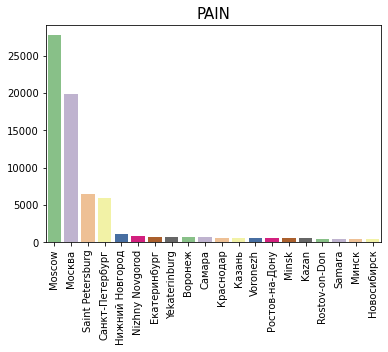

In [80]:
sns.barplot(city_count.index, city_count.values, palette='Accent') # рисуем график, выбираем цвет
plt.xticks(rotation=90) # разворачиваем подписи под городами на 90 градусов
plt.title('PAIN', fontsize=15)
plt.show() # показываем изображение

In [8]:
import pandas as pd
df = pd.read_csv("bolbfest_members.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

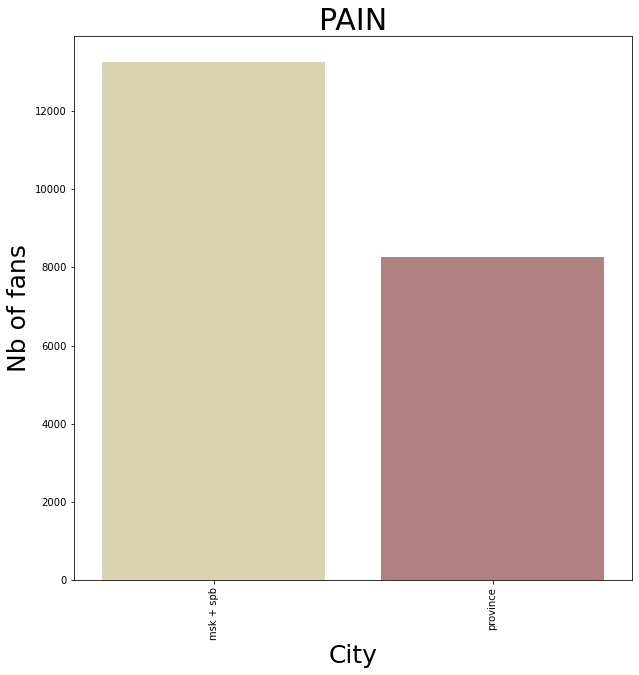

In [202]:
df.loc[(df['city'] == 'Moscow')] = "msk + spb"
df.loc[(df['city'] == 'Saint Petersburg')] = "msk + spb"
df.loc[(df['city'] != "msk + spb") & (df['city'] != "-")] = "province"


city_count  = df['city'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
city_count = city_count[:20] # первые 20 городов
plt.figure(figsize=(10,10)) #размер картинки
ax = sns.barplot(city_count.index,city_count.values, palette='pink_r') # рисуем график, выбираем цвет
plt.title('PAIN', fontsize=30)
plt.ylabel('Nb of fans', fontsize=25)
plt.xlabel('City', fontsize=25)
plt.xticks(rotation=90) # разворачиваем подписи под городами на 90 градусов
plt.show() # показываем изображение# your code here


In [12]:
!pip install natasha

In [13]:
from natasha import (Segmenter, MorphVocab, NewsEmbedding, 
NewsMorphTagger, NewsSyntaxParser, NewsNERTagger, PER, NamesExtractor, Doc)

In [14]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)
names_extractor = NamesExtractor(morph_vocab)

In [15]:
def get_posts(owner_id):
    first = vk_api.wall.get(domain=owner_id, count=100, filter="owner", v=5.124)
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 100  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data += vk_api.wall.get(domain=owner_id, v=5.124, filter="owner", count=100, offset=i*100)["items"]
    return [i['text'] for i in data]

In [16]:
posts = get_posts("bolbfest")

In [17]:
from datetime import datetime

In [18]:
posts[:10]

['Боль 2021🩸 [club189992300|2, 3, 4 июля.] \n\nMac DeMarco, King Krule, BADBADNOTGOOD, Beak>, EOB, Girl Band, Westerman, Wire, FAKA, HMLTD, Viagra Boys, Heavy Lungs, Giant Swan, Crack Cloud, Okmalumkoolkat, Bendik Giske, [club120827|АукцЫон], [club1407290|ТРИАГРУТРИКА], [club23196050|Moa Pillar], [club1092823|Петля Пристрастия], [club86558370|свидание], [club84900719|Деревянные киты], [club30622212|Труд], [club36661515|Электрофорез], [club152528676|Порез на Собаке], [club166831233|луни ана], [club146777582|СОЮЗ], [club127502455|Хадн дадн], Заур Нагоев, [club33092950|Спасибо], [club146137996|СИЯНИЕ], [club147243313|Crispy Newspaper], [club109598025|ЗАРНИЦА], [club156604089|КУЗИНА], [club110757761|акульи слёзы], [club163924548|ШТАДТ], [club67574910|НОТЭБЁРД], [club99147483|шумные и угрожающие выходки], [club93147709|Въеби ему, Донателло!], [club182898858|JRPJEJ], [club9536235|ИЛЬЯМАЗО], [club16641363|Голландский Штурвал], [club72844064|marat suleimanov].\n\nБилеты на Kassir.ru: vk.cc/9zL

In [19]:
import re

In [20]:
pattern_link = re.compile(r"[A-z0-9]+[:/\.]+[A-z0-9]+[\./]+[A-z0-9]+[A-z0-9\./]+\b")

In [21]:
def replace_weblinks(posts):
    return re.sub(pattern_link, "WEBLINK", posts)
posts = [replace_weblinks(post) for post in posts] 

In [22]:
posts

['Боль 2021🩸 [club189992300|2, 3, 4 июля.] \n\nMac DeMarco, King Krule, BADBADNOTGOOD, Beak>, EOB, Girl Band, Westerman, Wire, FAKA, HMLTD, Viagra Boys, Heavy Lungs, Giant Swan, Crack Cloud, Okmalumkoolkat, Bendik Giske, [club120827|АукцЫон], [club1407290|ТРИАГРУТРИКА], [club23196050|Moa Pillar], [club1092823|Петля Пристрастия], [club86558370|свидание], [club84900719|Деревянные киты], [club30622212|Труд], [club36661515|Электрофорез], [club152528676|Порез на Собаке], [club166831233|луни ана], [club146777582|СОЮЗ], [club127502455|Хадн дадн], Заур Нагоев, [club33092950|Спасибо], [club146137996|СИЯНИЕ], [club147243313|Crispy Newspaper], [club109598025|ЗАРНИЦА], [club156604089|КУЗИНА], [club110757761|акульи слёзы], [club163924548|ШТАДТ], [club67574910|НОТЭБЁРД], [club99147483|шумные и угрожающие выходки], [club93147709|Въеби ему, Донателло!], [club182898858|JRPJEJ], [club9536235|ИЛЬЯМАЗО], [club16641363|Голландский Штурвал], [club72844064|marat suleimanov].\n\nБилеты на Kassir.ru: WEBLINK\n

In [23]:
pattern_mention = re.compile(r"[\(\[]+[a-z0-9]+\|[A-z0-9 А-я'\/\(\)\"]+[\]()]")

In [24]:
def replace_mentions(posts):
    return re.sub(pattern_mention, "MENTION", posts)

In [25]:
posts = [replace_mentions(post) for post in posts]
print(posts)

['Боль 2021🩸 [club189992300|2, 3, 4 июля.] \n\nMac DeMarco, King Krule, BADBADNOTGOOD, Beak>, EOB, Girl Band, Westerman, Wire, FAKA, HMLTD, Viagra Boys, Heavy Lungs, Giant Swan, Crack Cloud, Okmalumkoolkat, Bendik Giske, MENTION, MENTION, MENTION, MENTION, MENTION, MENTION, MENTION, MENTION, MENTION, MENTION, MENTION, MENTION, Заур Нагоев, MENTION, MENTION, MENTION, MENTION, MENTION, [club110757761|акульи слёзы], MENTION, [club67574910|НОТЭБЁРД], MENTION, [club93147709|Въеби ему, Донателло!], MENTION, MENTION, MENTION, MENTION.\n\nБилеты на Kassir.ru: WEBLINK\n\nПриобрести билеты на фестиваль и получить кэшбэк 15% могут держатели карты Tinkoff в приложении и на сайте банка: WEBLINK\n\nВаши билеты с 2020 года остаются действительными на фестиваль в 2021 году!', 'монеточка у Дудя', 'Mac DeMarco — Other Here Comes The Cowboy Demos (2020)', 'Viagra Boys с новым треком и клипом "Ain\'t Nice" с альбома "Welfare Jazz", который ожидается 8 января 2021!', 'Лайв и интервью IDLES для радиостанции

In [69]:
def clean_text(posts):
    posts = re.sub(pattern_link, "WEBLINK", posts)
    posts = re.sub(pattern_mention, "MENTION", posts)
    posts = posts.replace("\n", " ")
    return posts
with open('texts.txt', 'w', encoding="utf-8") as f:
    for post in posts:
        cleaned = clean_text(post)
        f.write(cleaned+"\n")

In [70]:
posts = "".join(posts)

In [75]:
posts

'[club175111687|Фестиваль Боль возвращается!] В 2019 году собираемся в любимом MENTION, но теперь - внимание - три дня лучшей музыки мирового пространства.    Первые билеты - early bird - тут: WEBLINK-festival WEBLINK-2019 Билеты без комиссии: bolfest.com  Совсем скоро мы объявим первых артистов. Тогда же и подорожают билеты.'

In [30]:
words_re = [i.strip() for i in re.split(r"([ \.\?!,]{1,})", posts) if i.strip()] # и это повторяется от 1 до бесконечности раз
print(words_re)

['Боль', '2021🩸', '[club189992300|2', ',', '3', ',', '4', 'июля', '.', ']', 'Mac', 'DeMarco', ',', 'King', 'Krule', ',', 'BADBADNOTGOOD', ',', 'Beak>', ',', 'EOB', ',', 'Girl', 'Band', ',', 'Westerman', ',', 'Wire', ',', 'FAKA', ',', 'HMLTD', ',', 'Viagra', 'Boys', ',', 'Heavy', 'Lungs', ',', 'Giant', 'Swan', ',', 'Crack', 'Cloud', ',', 'Okmalumkoolkat', ',', 'Bendik', 'Giske', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', 'Заур', 'Нагоев', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', '[club110757761|акульи', 'слёзы]', ',', 'MENTION', ',', '[club67574910|НОТЭБЁРД]', ',', 'MENTION', ',', '[club93147709|Въеби', 'ему', ',', 'Донателло', '!', ']', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', '.', 'Билеты', 'на', 'Kassir', '.', 'ru:', 'WEBLINK\n\nПриобрести', 'билеты', 'на', 'фестивал

In [29]:
!pip install pymystem3

In [30]:
from pymystem3 import Mystem

In [31]:
!pip install emoji

  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49720 sha256=3934b3ba5ef8ef03698bd9e74ad873a19af944137fbd4053dbcdf880d4491031
  Stored in directory: c:\users\катерина\appdata\local\pip\cache\wheels\43\3d\82\e7baffa5e86346c6178d7750dba6e8ef063282a37fc563f8f8
Successfully built emoji


In [32]:
import emoji
from collections import Counter

class Preprocessing:
    def __init__(self, text):
        self.text = text
    
    def get_sentences(self):
        return [i.strip() for i in self.text.replace("!", ".").replace("?", ".").replace("...", ".").replace(".\n", ". ").split(". ")]
    
    def get_words(self):
        return [i.strip(".,!?") for i in self.text.split()]
        
    def get_counted_words(self):
        words = {}
        for word in self.text.lower().split():
            if word in words:
                words[word] += 1
            else:
                words[word] = 1
        return words
    
    def get_emojis(self):
        return set([i for i in self.text if i in emoji.UNICODE_EMOJI])

In [33]:
preprocess = Preprocessing(posts)

In [34]:
s = preprocess.get_words()

In [35]:
s

['Боль',
 '2021🩸',
 '[club189992300|2',
 '3',
 '4',
 'июля.]',
 'Mac',
 'DeMarco',
 'King',
 'Krule',
 'BADBADNOTGOOD',
 'Beak>',
 'EOB',
 'Girl',
 'Band',
 'Westerman',
 'Wire',
 'FAKA',
 'HMLTD',
 'Viagra',
 'Boys',
 'Heavy',
 'Lungs',
 'Giant',
 'Swan',
 'Crack',
 'Cloud',
 'Okmalumkoolkat',
 'Bendik',
 'Giske',
 'MENTION',
 'MENTION',
 'MENTION',
 'MENTION',
 'MENTION',
 'MENTION',
 'MENTION',
 'MENTION',
 'MENTION',
 'MENTION',
 'MENTION',
 'MENTION',
 'Заур',
 'Нагоев',
 'MENTION',
 'MENTION',
 'MENTION',
 'MENTION',
 'MENTION',
 '[club110757761|акульи',
 'слёзы]',
 'MENTION',
 '[club67574910|НОТЭБЁРД]',
 'MENTION',
 '[club93147709|Въеби',
 'ему',
 'Донателло!]',
 'MENTION',
 'MENTION',
 'MENTION',
 'MENTION',
 'Билеты',
 'на',
 'Kassir.ru:',
 'WEBLINK',
 'Приобрести',
 'билеты',
 'на',
 'фестиваль',
 'и',
 'получить',
 'кэшбэк',
 '15%',
 'могут',
 'держатели',
 'карты',
 'Tinkoff',
 'в',
 'приложении',
 'и',
 'на',
 'сайте',
 'банка:',
 'WEBLINK',
 'Ваши',
 'билеты',
 'с',
 '202

In [36]:
from nltk.tokenize import word_tokenize
from collections import Counter

In [45]:
with open('stopwords_russian.txt', 'r', encoding="utf-8") as f:
    stop_words = f.read().lower().split("\n")
    stop_words = set(stop_words) # чтобы слова не повторялись, а в сете неп овтоярюстя слова плюс питон быстрее ищет в сетах, а не

In [46]:
clean_words = [word for word in posts if word not in stop_words]

In [47]:
words = word_tokenize(posts) #делит текст по пробелама
len(words)

42089

In [48]:
words[:10]

['Боль', '2021🩸', '[', 'club189992300|2', ',', '3', ',', '4', 'июля', '.']

In [41]:
words = [i for i in words if i.isalnum()] #убираем !"" ())
len(words)

31501

In [42]:
len(Counter(words))

10057

In [61]:
def save_words_to_file(filename, members):
   save_words_to_file ("Bolbfestposts.txt", words)

In [50]:
Counter(clean_words).most_common(30)

[(' ', 31659),
 ('н', 10208),
 ('р', 7377),
 ('л', 7119),
 ('п', 4585),
 ('д', 4167),
 ('\n', 4095),
 ('ы', 3627),
 ('ь', 3492),
 ('N', 2453),
 (',', 2410),
 ('з', 2314),
 ('б', 2245),
 ('й', 2231),
 ('.', 2032),
 ('ч', 2032),
 ('E', 1735),
 ('I', 1732),
 ('o', 1544),
 (':', 1487),
 ('х', 1289),
 ('ш', 1273),
 ('T', 1111),
 ('ф', 1063),
 ('ю', 1042),
 ('K', 1021),
 ('B', 1010),
 ('L', 976),
 ('W', 944),
 ('Б', 905)]

In [51]:
with open("stopwords_russian.txt", 'r', encoding="utf-8") as f:
    stop_words = f.read().lower().split("\n")
    stop_words = set(stop_words) # чтобы слова не повторялись, а в сете неп овтоярюстя слова плюс питон быстрее ищет в сетах, а не в списках

In [52]:
clean_words = [word for word in words if word not in stop_words]

In [53]:
Counter(clean_words).most_common(30)

[(',', 2407),
 ('.', 1564),
 (':', 1400),
 ('MENTION', 669),
 ('«', 664),
 ('»', 663),
 ('!', 626),
 ('WEBLINK', 526),
 ('Боль', 374),
 ('Билеты', 279),
 ('В', 271),
 ('приложении', 228),
 ('Tinkoff', 226),
 ('-', 222),
 ('Фестиваль', 204),
 ('bolfest.com', 201),
 ('•', 198),
 ('Ponominalu', 179),
 ('Афиша', 174),
 ('Яндекс', 173),
 ('–', 165),
 (')', 162),
 ('(', 155),
 ('фестивале', 149),
 ('?', 146),
 ('2019', 137),
 (']', 129),
 ('фестиваль', 128),
 ('[', 127),
 ('—', 122)]

In [54]:
doc = Doc(posts)
doc.segment(segmenter)

In [55]:
[i.text for i in doc.sents]

['Боль 2021🩸 [club189992300|2, 3, 4 июля.]',
 'Mac DeMarco, King Krule, BADBADNOTGOOD, Beak>, EOB, Girl Band, Westerman, Wire, FAKA, HMLTD, Viagra Boys, Heavy Lungs, Giant Swan, Crack Cloud, Okmalumkoolkat, Bendik Giske, MENTION, MENTION, MENTION, MENTION, MENTION, MENTION, MENTION, MENTION, MENTION, MENTION, MENTION, MENTION, Заур Нагоев, MENTION, MENTION, MENTION, MENTION, MENTION, [club110757761|акульи слёзы], MENTION, [club67574910|НОТЭБЁРД], MENTION, [club93147709|Въеби ему, Донателло!], MENTION, MENTION, MENTION, MENTION.',
 'Билеты на Kassir.ru: WEBLINK\n\nПриобрести билеты на фестиваль и получить кэшбэк 15% могут держатели карты Tinkoff в приложении и на сайте банка: WEBLINK\n\nВаши билеты с 2020 года остаются действительными на фестиваль в 2021 году!монеточка у ДудяMac DeMarco — Other Here Comes The Cowboy Demos (2020)Viagra Boys с новым треком и клипом "Ain\'t Nice" с альбома "Welfare Jazz", который ожидается 8 января 2021!Лайв и интервью IDLES для радиостанции KEXP 👀MENTION 

In [56]:
print([i.text for i in doc.tokens])

['Боль', '2021', '🩸', '[', 'club', '189992300', '|', '2,', '3,', '4', 'июля', '.', ']', 'Mac', 'DeMarco', ',', 'King', 'Krule', ',', 'BADBADNOTGOOD', ',', 'Beak', '>', ',', 'EOB', ',', 'Girl', 'Band', ',', 'Westerman', ',', 'Wire', ',', 'FAKA', ',', 'HMLTD', ',', 'Viagra', 'Boys', ',', 'Heavy', 'Lungs', ',', 'Giant', 'Swan', ',', 'Crack', 'Cloud', ',', 'Okmalumkoolkat', ',', 'Bendik', 'Giske', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', 'Заур', 'Нагоев', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', '[', 'club', '110757761', '|', 'акульи', 'слёзы', ']', ',', 'MENTION', ',', '[', 'club', '67574910', '|', 'НОТЭБЁРД', ']', ',', 'MENTION', ',', '[', 'club', '93147709', '|', 'Въеби', 'ему', ',', 'Донателло', '!', ']', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', ',', 'MENTION', '.', 'Билеты', 'на', 

In [57]:
doc.tag_morph(morph_tagger)
for token in doc.tokens:
    token.lemmatize(morph_vocab)

In [58]:
print([i.lemma for i in doc.tokens])

['боль', '2021', '🩸', '[', 'club', '189992300', '|', '2,', '3,', '4', 'июль', '.', ']', 'mac', 'demarco', ',', 'king', 'krule', ',', 'badbadnotgood', ',', 'beak', '>', ',', 'eob', ',', 'girl', 'band', ',', 'westerman', ',', 'wire', ',', 'faka', ',', 'hmltd', ',', 'viagra', 'boys', ',', 'heavy', 'lungs', ',', 'giant', 'swan', ',', 'crack', 'cloud', ',', 'okmalumkoolkat', ',', 'bendik', 'giske', ',', 'mention', ',', 'mention', ',', 'mention', ',', 'mention', ',', 'mention', ',', 'mention', ',', 'mention', ',', 'mention', ',', 'mention', ',', 'mention', ',', 'mention', ',', 'mention', ',', 'заур', 'нагоев', ',', 'mention', ',', 'mention', ',', 'mention', ',', 'mention', ',', 'mention', ',', '[', 'club', '110757761', '|', 'акулий', 'слеза', ']', ',', 'mention', ',', '[', 'club', '67574910', '|', 'нотэбердо', ']', ',', 'mention', ',', '[', 'club', '93147709', '|', 'въести', 'он', ',', 'донателло', '!', ']', ',', 'mention', ',', 'mention', ',', 'mention', ',', 'mention', '.', 'билет', 'на', 

In [59]:
doc.tag_ner(ner_tagger)

In [60]:
for span in doc.spans:
    print(posts[span.start:span.stop], span.type)

King Krule ORG
BADBADNOTGOOD ORG
Beak ORG
Girl Band ORG
Westerman ORG
Wire ORG
FAKA ORG
Viagra Boys ORG
Heavy Lungs ORG
Crack Cloud ORG
Okmalumkoolkat ORG
Bendik Giske ORG
MENTION ORG
Заур Нагоев PER
MENTION ORG
Kassir.ru ORG
Дудя PER
Viagra Boys ORG
IDLES ORG
KEXP 👀MENTION ORG
Продакшн PER
MENTION ORG
Электросон PER
Электросон PER
MENTION ORG
ВИА ORG
Запечатанная PER
Боль🩸На PER
MENTION ORG
ЦЕНТР ORG
MENTION ORG
Агломерат LOC
Хадн Дадн PER
СОЮЗ ORG
Лютиком PER
Supruga ORG
Tyagotenie ORG
Василия Шумова PER
ЦЕНТР ORG
Любляны LOC
The Canyon Observer ORG
Арендт PER
Боль PER
Сад Имени Федора ORG
Дом Силы ORG
Дома Силы ORG
MENTION ORG
Максим Тесли PER
Тесли PER
Подключайтесь PER
Максимом Тесли PER
Максим PER
Леонида Губанова PER
Рафала Воячека PER
MENTION ORG
Андрей Ванюков PER
Сэфди PER
Даниэля Лопатина PER
Ричарда Линклейтера PER
Индонезии LOC
Вонг Карвая PER
Детройт ORG
Голландский Штурвал ORG
Подключаемся PER
Аптечка PER
MENTION ORG
MENTION ORG
Fontaines D.C. ORG
Radio X’s ORG
MENTION O

In [62]:
with open("Bolbfestposts.txt", 'w', encoding="utf-8") as w:
    for i in posts:
        w.write(i+"\n")

In [63]:
locations = set()
persons = set()
organizations = set()

with open("texts.txt", 'r', encoding="utf-8") as f:
    for line in f:
        posts = line.strip()
        
        doc = Doc(posts)
        doc.segment(segmenter)
        doc.tag_morph(morph_tagger)
        doc.tag_ner(ner_tagger)
        
        for span in doc.spans:
            span.normalize(morph_vocab)
        
            if span.type == 'LOC':
                locations.add(span.normal)
            
            elif span.type == 'PER':
                persons.add(span.normal)
            
            elif span.type == 'ORG':
                organizations.add(span.normal)

In [65]:
print(locations)

{'Будапешт', 'Исландия', 'Великобритания', 'Левайс', 'Омск', 'Даркменистан', 'Украина', 'Въеби', 'Иерусалим', 'Хадн', 'Санкт-Петербург', 'Словения', 'Петровский бульвар', 'Екатеринбург', 'Саха', 'Литва', 'Грузия', 'Августовское', 'Пермь', 'Москве💥', 'Ионотек', 'Россия', 'Европа', 'Солянка', 'Томск', 'Самара', 'Казахстан', 'Детройт', 'Авиатор', 'Петербург', 'Африка', 'Дублин', 'Сан-Франциско', 'Сартр', 'Нижний Новгород', 'Нью-Йорк', 'Зимний сад', 'Минск', 'Лондон', 'США', 'Восточная', 'Подмосков', 'Ростов', 'Брайтон', 'Ванкувер', 'Евросонике', 'Меркурий', 'Рим', 'Смоленска', 'Париж', 'Манчестер', 'Казань', 'Дальний Восток', 'Москва', 'Пруд', 'Любляны', 'Еще', 'Нальчик', 'Кабардино-Балкария', 'Белоруссия', 'Погружающиеся', 'Ночной Проспект', 'СССР', 'Агломерат', 'Ростовская', 'Англия', 'Кавказ', 'Маяковская', 'Автозаводская улица', 'Северное Тушино', 'Убежище', 'Подмосковье', 'Берлин', 'Индонезия', 'Мурманск', 'Эстония', 'Ленинград', 'Урал', 'Япония', 'Сторона', 'Кавказские горы', 'Токио

In [66]:
print(persons)

{'Миша Шамков', 'Даркменистан', 'Оксимирон', 'Гуссерля', 'Катя', 'Дмитрий Гаврилов', 'Миша Мясников', 'Максим', 'Алексей Крученых', 'Андрей Алгоритмик', 'Саши Куликовский', 'Джон Маус', 'Бренер', 'Албарна', 'Фидель Кастро', 'Мику Хакинена', 'Мефодий-повеса', 'Продакшн', 'Слава', 'Горбунов', 'Неоретро', 'Саймон Тонг', 'Поко Кокс', 'Феликс Микенский', 'Сэфди', 'Паршин', 'Хайдеггер', 'Женя', 'Булат Халилов', 'Стримы', 'Соло', 'Олян Кузьменкова', 'Мейясу', 'Хант', 'Михаил Левин', 'Деймон', 'Тони Аллен', 'Роберт Плант', 'Валдис Белых', 'Андрей Митрошин', 'Никита Чернат', 'Колин Стетсон', 'Аукцыон', 'Sophie  Гипертрофированная', 'Жени Горбунов', 'Рафал Воячека', 'Варвара', 'Питер Паркер', 'Дублинке', 'Серена Кьеркегор', 'Тесли', 'Александра Элбакян', 'Мидборн', 'Крузенштерн', 'Антоха Жаголкин', 'Павел', 'Максим Горький', 'Комбу', 'Земфира', 'Монеточкой', 'Алина Голубева', 'Рома Параноид', 'Альтюссер', 'Антон', 'Умберто Эко', 'Пины', 'Шичепшин', 'Деррид', 'Всеволод Лисовский', 'Света Матвеева

In [74]:
print(organizations)

{'Ored Recordings', 'СО', 'Google', 'Gideon Coe', 'Живой журнал', 'WIRE', 'Algiers', 'Рыцари', 'Facebook', 'Tinkoff', 'ЦЕНТР', 'Антишколе', 'Bad Zu', 'The Fall', 'Kate NV', 'App', 'BADBADNOTGOOD', 'WIRE (UK)', "Levi's", 'Kånken', 'The Bad & The Queen', 'King Krule', 'Ingushit', 'Ionoff Music', 'Nice Guy', 'Gorillaz', 'Престарелых Аутисты', 'Black Midi', 'Guy Garvey', 'Солянке', 'WEBLINK', 'Radio X’s', 'Вконтакте', 'PHO Fighters', 'Westerman', 'Pitchfork', 'Heavy Lungs', 'ЗАЛП', 'Damon Albarn', 'Pippi & the Faggots', 'Интурист', 'Афиша', 'FOR', 'MENTION⚡', 'Radio Waking', 'Masana Temples', 'Fontaines D', 'Poexxxali', 'Joy Division', 'Арендт', "LEVI'S FRONTWOMAN", 'Tyagotenie', 'Дома Силы', 'Timepad', 'Пасош', 'Параллельная Резиденция', 'Гегель', 'Kassir', 'НИИ Косметика   Песню', 'Pop Farm', 'Vibe', 'Apadakaladas', 'Комба', 'Зарница', 'Несогласие', 'Skins', 'MENTION Daily', 'Warmduscher', 'Kunteynir', 'Союз', 'НИИ Косметика Ну', 'Kassir.ru', 'Uber', 'Noa', 'Sewage Sour', 'БОЛЬ 2020', 'P